In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('/home/mehdi/github/LSSutils')
from lssutils.utils import histogram_cell

In [2]:
path = '/home/mehdi/data/eboss/data/v7_2/1.0/measurements/cl/'


dcl = {}


dcl['systot'] = np.load(f'{path}cl_NGC_knownsystot_mainhighz_512_v7_2_main.npy', allow_pickle=True).item()
dcl['noweight'] = np.load(f'{path}cl_NGC_noweight_mainhighz_512_v7_2_main.npy', allow_pickle=True).item()
dcl['nnknown'] = np.load(f'{path}cl_NGC_known_mainhighz_512_v7_2_main.npy', allow_pickle=True).item()
dcl['nnall'] = np.load(f'{path}cl_NGC_all_mainhighz_512_v7_2_main.npy', allow_pickle=True).item()

In [3]:
def add_cl(ax, cli, shade, **kw):
    
    for i in range(2):        
        lb, clb_sg = histogram_cell(cli['cl_sg'][i]['cl'])
        lb, clb_ss = histogram_cell(cli['cl_ss'][i]['cl'])
        
        clb = clb_sg*clb_sg / clb_ss
        
        ax[i].plot(lb, clb, marker='.', ms=10, **kw)
        
        if shade:
            lb, _, clb_e = histogram_cell(cli['cl_gg'], return_err=True, method='jackknife')
            ax[i].fill_between(lb, 0, clb_e, color='grey', alpha=0.1, zorder=-1, label=r'$\sigma C_{g,g}$')

    return ax

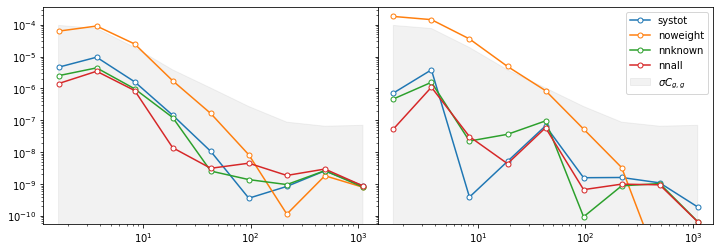

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True, sharex=True)
fig.subplots_adjust(wspace=0)

for name in dcl:
    add_shade = True if name=='noweight' else False
    add_cl(ax, dcl[name], add_shade, label=name, mfc='w')

ax[1].legend()
ax[0].set_yscale('log')
ax[0].set_xscale('log')


Ideally we will run the cell code on the mocks, and use `chi2 = (D - M)^-1 C (D-M)` where C is the inverse of the covariance matrix from the mocks, D is the measured C_ell and M is the mean measured C_ell from the mocks. 

In [18]:
cl = np.load('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/cl/cl_NGC_knownsystot_mainhighz_512_v7_2_main.npy', allow_pickle=True).item()

(1e-06, 2e-05)

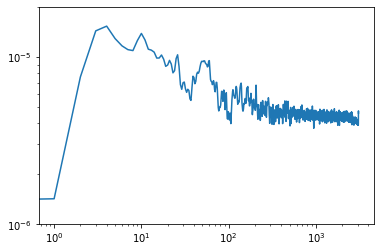

In [24]:
plt.loglog(cl['cl_gg']['cl'])
plt.ylim(1.0e-6, 2.0e-5)

In [25]:
len(cl['cl_gg']['cl'])

3072

In [6]:
import pandas as pd

In [7]:
md = pd.read_hdf('/home/mehdi/data/templates/dr9/dr9_combined256.h5')

In [12]:
import healpy as hp

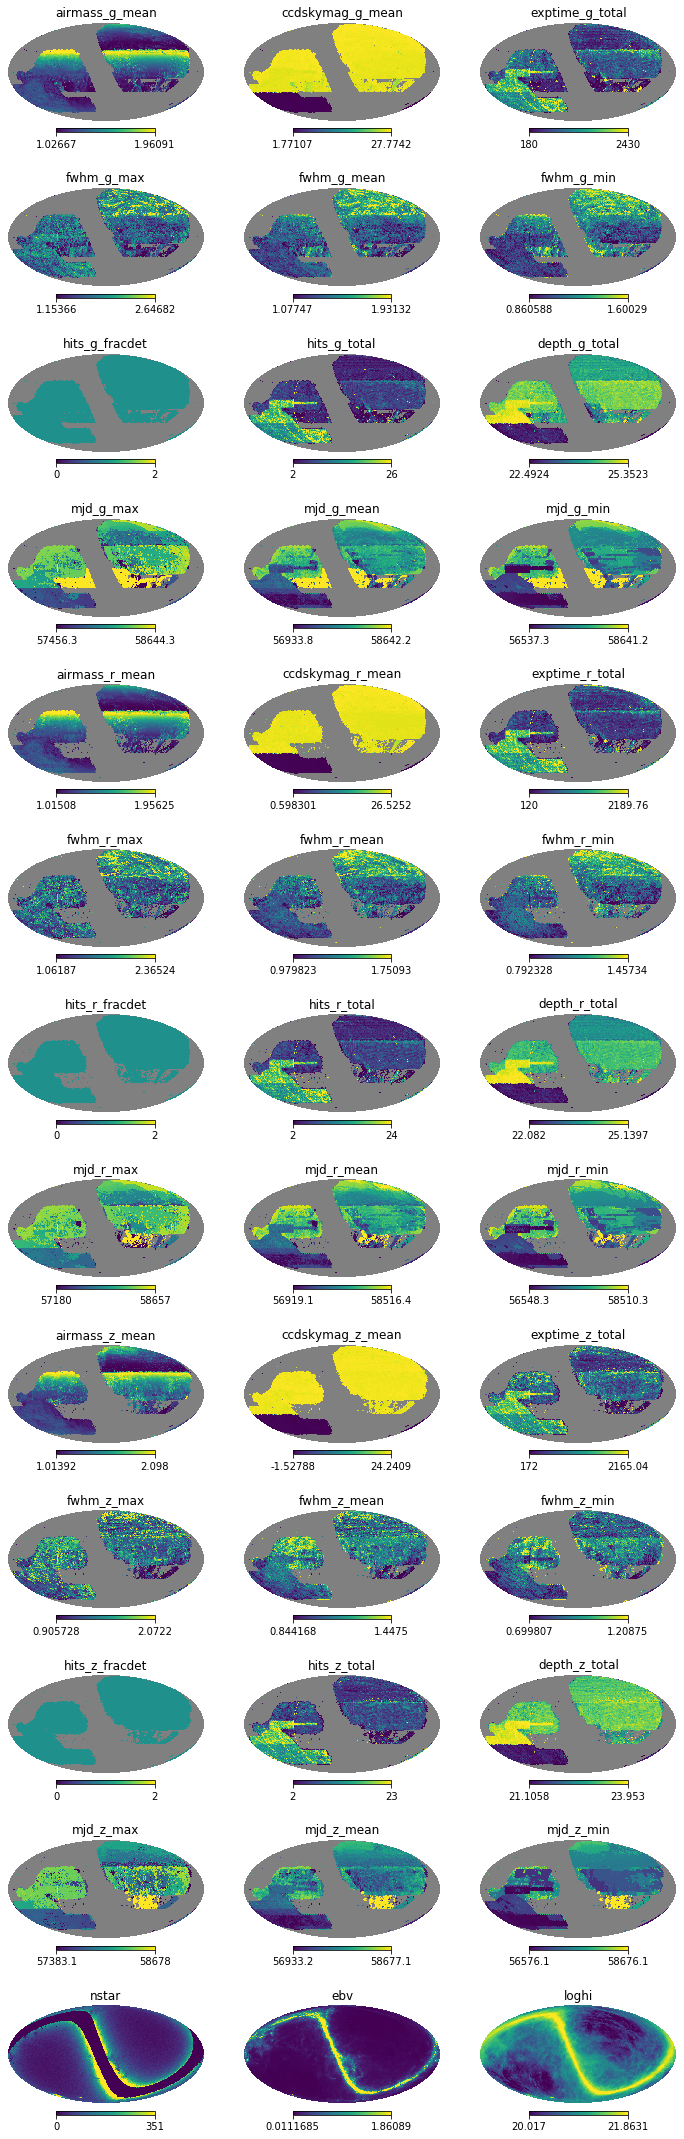

In [17]:

nmaps = md.shape[1]
ncols = 3
nrows = nmaps // ncols
if np.mod(nmaps, ncols)!=0:
    nrows += 1

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, 
                       figsize=(4*ncols, 3*nrows))

ax=ax.flatten()
for i,name in enumerate(md.columns):
    plt.sca(ax[i])
    
    good = np.isfinite(md[name])
    vmin, vmax = np.percentile(md[name][good], [2.5, 97.5])
    hp.mollview(md[name], hold=True, title=name, rot=-89, min=vmin, max=vmax)

plt.savefig('templates_dr9.png', bbox_inches='tight', dpi=300)